In [5]:
#Cargar las librerias necesarias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
#Creación y lectura de datos 
Datos = pd.read_csv('./heart_cleveland_upload.csv')

Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

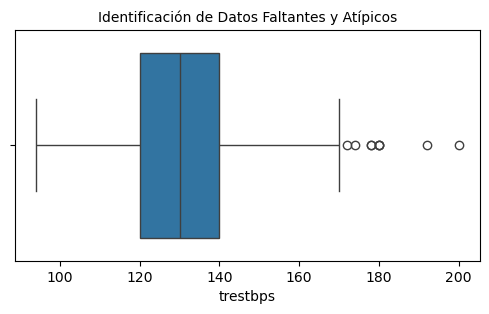

In [11]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [13]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Colesterol: ",Datos['chol'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Nivel de Colesterol:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos - Colesterol')

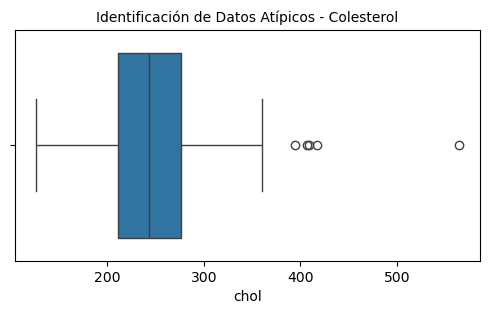

In [15]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos - Colesterol', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

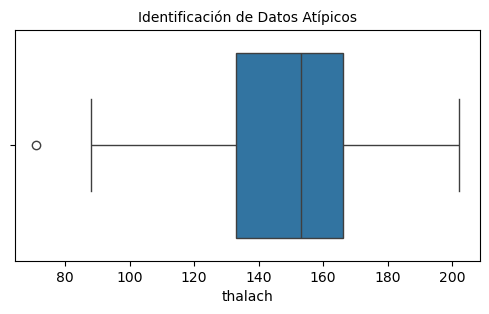

In [17]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

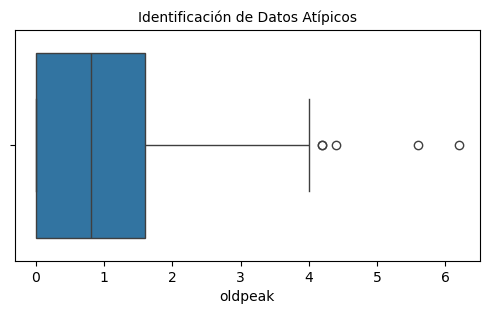

In [19]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [53]:
#Variables importantes identificadas:

#Conteo de Datos Atípicos - Colesterol
nivel_minimo_chol=100 
nivel_maximo_chol=400 
Total_Atp_chol=((Datos['chol']<nivel_minimo_chol)|(Datos['chol']>nivel_maximo_chol)).sum()
print("El total de datos atípicos en Colesterol es: {}".format(Total_Atp_chol))

El total de datos atípicos en Colesterol es: 4


In [61]:
#Conteo de Datos Atípicos - Thalach (esfuezo máximo)
nivel_minimo_th=120 
nivel_maximo_th=240 
Total_Atp_th=((Datos['thalach']<nivel_minimo_th)|(Datos['thalach']>nivel_maximo_th)).sum()
print("El total de datos atípicos en Thalach (esfuezo máximo) es: {}".format(Total_Atp_th))

El total de datos atípicos en Thalach (esfuezo máximo) es: 33


In [33]:
#Conteo de Datos Atípicos - Oldpeak (depresión  ST)
nivel_minimo_op=0 
nivel_maximo_op=4 
Total_Atp_op=((Datos['oldpeak']<nivel_minimo_op)|(Datos['oldpeak']>nivel_maximo_op)).sum()
print("El total de datos atípicos en Oldpeak (depresión  ST) es: {}".format(Total_Atp_op))

El total de datos atípicos en Oldpeak (depresión  ST) es: 5


In [51]:
#Conteo de Datos Atípicos - Slope (pendiente  ST)
nivel_minimo_slp=0 
nivel_maximo_slp=2 
Total_Atp_slp=((Datos['slope']<nivel_minimo_slp)|(Datos['slope']>nivel_maximo_slp)).sum()
print("El total de datos atípicos en Slope (pendiente  ST) es: {}".format(Total_Atp_slp))

El total de datos atípicos en Slope (pendiente  ST) es: 0


In [57]:
#Conteo de Datos Atípicos - Ca (Enfermedad coronaria según vasos)
nivel_minimo_ca=0 
nivel_maximo_ca=3 
Total_Atp_ca=((Datos['ca']<nivel_minimo_ca)|(Datos['ca']>nivel_maximo_ca)).sum()
print("El total de datos atípicos en Ca (Enfermedad coronaria según vasos) es: {}".format(Total_Atp_ca))

El total de datos atípicos en Ca (Enfermedad coronaria según vasos) es: 0


In [65]:
#Conteo de Datos Atípicos - Condition (Padece de Enfermedad)
nivel_minimo_cond=0 
nivel_maximo_cond=1 
Total_Atp_cond=((Datos['condition']<nivel_minimo_cond)|(Datos['condition']>nivel_maximo_cond)).sum()
print("El total de datos atípicos en Condition (Padece de Enfermedad) es: {}".format(Total_Atp_cond))

El total de datos atípicos en Condition (Padece de Enfermedad) es: 0


In [83]:
# Filtra Datos Atípicos - Colesterol
Datos=Datos[(Datos['chol']<nivel_maximo_chol)&(Datos['chol']>nivel_minimo_chol)]

# Validar si se removieron los datos atípicos
Total_Atp_chol=((Datos['chol']<nivel_minimo_chol)|(Datos['chol']>nivel_maximo_chol)).sum()
print("El total de datos atípicos - Colesterol es {}".format(Total_Atp_chol))

El total de datos atípicos - Colesterol es 0


In [77]:
# Filtra Datos Atípicos - Thalach (esfuezo máximo)
Datos=Datos[(Datos['thalach']<nivel_maximo_th)&(Datos['thalach']>nivel_minimo_th)]

# Validar si se removieron los datos atípicos
Total_Atp_th=((Datos['thalach']<nivel_minimo_th)|(Datos['thalach']>nivel_maximo_th)).sum()
print("El total de datos atípicos - Thalach (esfuezo máximo) es {}".format(Total_Atp_th))

El total de datos atípicos - Thalach (esfuezo máximo) es 0


In [89]:
# Filtra Datos Atípicos - Oldpeak (depresión  ST)
Datos=Datos[(Datos['oldpeak']<nivel_maximo_op)&(Datos['oldpeak']>nivel_minimo_op)]

# Validar si se removieron los datos atípicos
Total_Atp_op=((Datos['oldpeak']<nivel_minimo_op)|(Datos['oldpeak']>nivel_maximo_op)).sum()
print("El total de datos atípicos - Oldpeak (depresión  ST) es {}".format(Total_Atp_op))

El total de datos atípicos - Oldpeak (depresión  ST) es 0


In [91]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        159 non-null    int64  
 1   sex        159 non-null    int64  
 2   cp         159 non-null    int64  
 3   trestbps   159 non-null    int64  
 4   chol       159 non-null    int64  
 5   fbs        159 non-null    int64  
 6   restecg    159 non-null    int64  
 7   thalach    159 non-null    int64  
 8   exang      159 non-null    int64  
 9   oldpeak    159 non-null    float64
 10  slope      159 non-null    int64  
 11  ca         159 non-null    int64  
 12  thal       159 non-null    int64  
 13  condition  159 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 18.6 KB


In [95]:
# Total de personas con enfermedad
Datos['condition'].value_counts()

condition
0    83
1    76
Name: count, dtype: int64

In [97]:
Datos[['condition']].head(10)

,condition
0,0
1,0
3,1
4,0
5,0
6,0
7,1
8,0
10,1
12,1


In [103]:
# Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%

# Variables X y Y para almacenar la información del entrenamiento:
X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
4     64    1   0       110   211    0        2      144      1      1.8   
246   54    1   3       110   239    0        0      126      1      2.8   
240   55    1   3       132   353    0        0      132      1      1.2   
126   50    1   2       140   233    0        0      163      0      0.6   
97    59    1   2       150   212    1        0      157      0      1.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
231   57    0   3       120   354    0        0      163      1      0.6   
228   57    1   3       110   335    0        0      143      1      3.0   
105   57    1   2       150   126    1        0      173      0      0.2   
294   35    1   3       120   198    0        0      130      1      1.6   
288   42    1   3       136   315    0        0      125      1      1.8   

     slope  ca  thal  
4        1   0     0  
246      1   1     2  
240      1   1    

In [105]:
print (Y_train)

4      0
246    1
240    1
126    1
97     0
      ..
231    0
228    1
105    0
294    1
288    1
Name: condition, Length: 119, dtype: int64


In [109]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

print (Prediccion)

[1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 1]


In [118]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.79      0.79      0.79        19

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



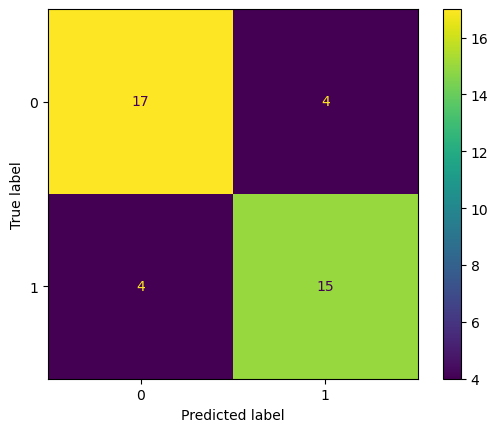

In [114]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

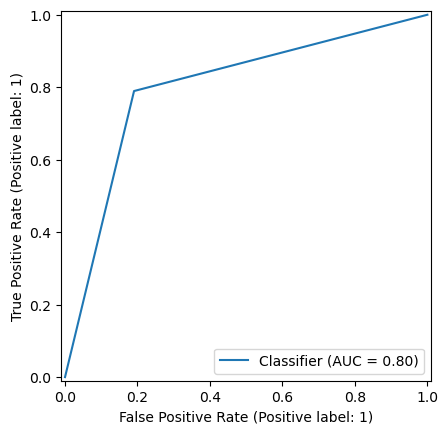

In [116]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()